# 机器学习之朴素贝叶斯分类器

#### 【简介】

**朴素贝叶斯分类算法**是基于**贝叶斯理论**和特征**条件独立假设**的分类算法。对于给定的训练集，首先基于特征条件独立假设学习数据的概率分布。然后基于此模型，对于给定的特征数据x，利用贝叶斯定理计算出标签y。朴素贝叶斯分类算法实现简单，预测效率很高，是一种常用的分类算法。

#### 【目录】

1. [条件概率](#1.-条件概率)
2. [贝叶斯公式](#2.-贝叶斯公式)
3. [朴素贝叶斯分类算法流程](#3.-朴素贝叶斯分类算法流程)
4. [拉普拉斯平滑](#4.-拉普拉斯平滑)
5. [新闻文本主题分类](#5.-新闻文本主题分类)

## 1. 条件概率

朴素贝叶斯分类算法是基于贝叶斯定理与特征条件独立假设的分类方法，因此想要了解朴素贝叶斯分类算法背后的算法原理，就不得不用到概率论的一些知识，首当其冲就是**条件概率**。接下来就开启我们的条件概率之旅吧。

### 什么是条件概率

**概率**指的是某一**事件A发生**的**可能性**，表示为`P(A)` 。而**条件概率**指的是某一**事件A已经发生**了条件下，另一**事件B发生的可能性**，表示为`P(B|A)` ，举个例子：

- 今天有25%的可能性下雨，即P(下雨)=0.25
- 今天75%的可能性是晴天，即P(晴天)=0.75
- 如果下雨，我有75%的可能性穿外套，即P(穿外套|下雨)=0.75
- 如果下雨，我有25%的可能性穿T恤，即P(穿T恤|下雨)=0.25

从上述例子可以看出，条件概率描述的是`|`右边的事件已经发生之后，左边的事件发生的可能性，而**不是**两个事件**同时发生**的**可能性**！

### 怎样计算条件概率

设A，B是两个事件，且`P(A)>0`，称`P(B|A) = P(AB)/P(A)`为在事件`A`发生的条件下，事件`B`发生的条件概率。(其中`P(AB)` 表示事件A和事件B同时发生的概率)。

举个例子，现在有一个表格，表格中统计了甲乙两个厂生产的产品中合格品数量、次品数量的数据。数据如下：

| 产品 | 甲厂 | 乙厂 | 合计 |
|:-- |:-- |:-- |:-- |
| 合格品 | 475 | 644 | 1119 |
| 次品 | 25 | 56 | 81 |
| 合计 | 500 | 700 | 1200 |

现在想要算一下已知产品是甲厂生产的，那么产品是次品的概率是多少。这个时候其实就是在算条件概率，计算非常简单。

假设事件A为产品是甲厂生产的，事件B为产品是次品。则根据表中数据可知P(AB)=25/1200，P(A)=500/1200。则P(B|A)=P(AB)/P(A)=25/500。

### 乘法定理

将条件概率的公式两边同时乘以`P(A)`，就变成了**乘法定理**，即`P(AB)=P(B|A)*P(A)`。那么乘法定理怎么用呢？举个例子：

现在有一批产品共100件，次品有10件，从中不放回地抽取2次，每次取1件。现在想要算一下第一次为次品，第二次为正品的概率。

从问题来看，这个问题问的是第一次为次品，第二次为正品这两个事件同时发生的概率。所以可以用乘法定理来解决这个问题。

假设事件A为第一次为次品，事件B为第二次为正品。则`P(AB)=P(A)*P(B|A)=(10/100)*(90/99)=0.091`。

## 2. 贝叶斯公式

### 全概率公式

贝叶斯公式是朴素贝叶斯分类算法的核心数学理论，在了解贝叶斯公式之前，我们需要先了解全概率公式的相关知识。

#### 引例

小明从家到公司上班总共有三条路可以直达，如下图：

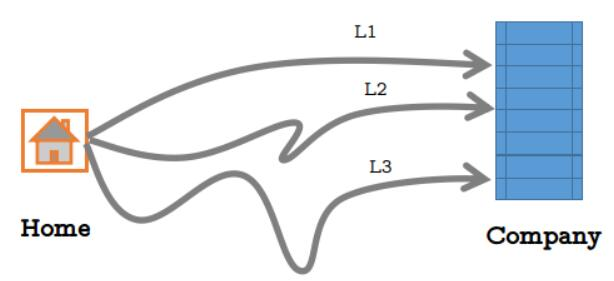

但是每条路每天拥堵的可能性不太一样，由于路的远近不同，选择每条路的概率如下表所示：

| L1 | L2 | L3 |
|:-- |:-- |:-- |
| 0.5 | 0.3 | 0.2 |

每天从上述三条路去公司时不堵车的概率如下表所示：

| L1不堵车 | L2不堵车 | L3不堵车 |
|:-- |:-- |:-- |
| 0.2 | 0.4 | 0.7 |

如果不堵车就不会迟到，现在小明想要算一算去公司上班不会迟到的概率是多少，应该怎么办呢？

其实很简单，假设事件`C`为小明不迟到，事件`A1`为小明选`L1`这条路并且不堵车，事件`A2`为小明选`L2`这条路并且不堵车，事件`A3`为小明选`L3`这条路并且不堵车。那么很显然`P(C)=P(A1)+P(A2)+P(A3)`。

那么问题来了，`P(A1)`、`P(A2)`和`P(A3)`怎么算呢？其实只要会算`P(A1)`其他的就都会算了。我们同样可以假设事件D1为小明选择L1路，事件E1为不堵车。那么`P(A1)=P(D1)*P(E1)`。但是在从表格中我们只知道`P(D1)=0.5`，怎么办呢？

回忆一下上一关介绍的乘法定理，不难想到`P(A1)=P(D1)*P(E1|D1)`。从表格中可以看出`P(E1|D1)=0.2`。因此`P(A1)=0.5*0.2=0.1`。

然后依葫芦画瓢可以很快算出，`P(A2)=0.3*0.4=0.12`，`P(A3)=0.2*0.7=0.14`。所以`P(C)=0.1+0.12+0.14=0.36`。

#### 全概率公式

当为了达到某种目的，但是达到目的有很多种方式，如果想知道通过所有方式能够达到目的的概率是多少的话，就需要用到全概率公式（上面的例子就是这种情况！）。全概率公式的定义如下：

若事件$B_1,B_2,...,B_n$两两互不相容，并且其概率和为1。那么对于任意一个事件$C$都满足：

$$
P(C) = P(B_1)P(C|B_1)+ ... + P(B_n)P(C|B_n) = \sum_{i=1}^n P(B_i)P(C|B_i)
$$

### 贝叶斯公式

当已知引发事件发生的各种原因的概率，想要算该事件发生的概率时，我们可以用**全概率公式**。但如果现在反过来，**已知事件已经发生**了，但想要**计算引发该事件的各种原因的概率**时，我们就需要用到**贝叶斯公式**了。

**贝叶斯公式**定义如下，其中$A$表示已经发生的事件，$B_i$为导致事件$A$发生的第$i$个原因：

$$
P(B_i|A) = \frac{P(A|B_i)P(B_i)}{\sum_{i=1}^n P(A|B_i)P(B_i)}
$$

贝叶斯公式看起来比较复杂，其实非常简单，分子部分是**乘法定理**，分母部分是**全概率公式**（分母等于$P(A)$）。

如果我们对贝叶斯公式进行一个简单的数学变换（两边同时乘以分母，再两边同时除以$P(B_i)$)）。就能够得到如下公式：

$$
P(A|B_i) = \frac{P(B_i|A)P(A)}{P(B_i)}
$$

这个公式是朴素贝叶斯分类算法的核心数学公式。

## 3. 朴素贝叶斯分类算法流程

### 任务描述

实现贝叶斯分类器模型的训练与预测。

### 相关知识

为了完成本任务，需要掌握：

- 朴素贝叶斯分类算法的训练流程
- 朴素贝叶斯分类算法的预测流程

#### 引例

在炎热的夏天你可能需要买一个大西瓜来解暑，但虽然你的挑西瓜的经验很老道，但还是会有挑错的时候。尽管如此，你可能还是更愿意相信自己经验。假设现在在你面前有一个纹路清晰，拍打西瓜后声音浑厚，按照你的经验来看这个西瓜是好瓜的概率有80%，不是好瓜的概率有20%。那么在这个时候你下意识会认为这个西瓜是好瓜，因为它是好瓜的概率大于不是好瓜的概率。

#### 朴素贝叶斯分类算法的预测流程

**朴素贝叶斯分类算法**的**预测思想**和引例中挑西瓜的思想一样，会**根据以往的经验**计算出待**预测数据分别为所有类别**的**概率**，然后**挑选**其中**概率最高**的**类别**作为**分类结果**。

假如现在一个西瓜的数据如下表所示：

| 颜色 | 声音 | 纹理 | 是否为好瓜 |
|:-- |:-- |:-- |:-- |
| 绿 | 清脆 | 清晰 | ？|

若想使用朴素贝叶斯分类算法的思想，根据这条数据中颜色、声音和纹理这三个特征来推断是不是好瓜，我们需要计算出这个西瓜是好瓜的概率和不是好瓜的概率。

假设事件A1为好瓜，事件B为绿，事件C为清脆，事件D为清晰，则这个西瓜是好瓜的概率为P(A1|BCD)。根据上一关中最后提到的公式可知:

$$
P(A_1|BCD) = \frac{P(A_1)P(B|A_1)P(C|A_1)P(D|A_1)}{P(BCD)}
$$

同样，假设事件A2为不是好瓜，事件B为绿，事件C为清脆，事件D为清晰，则这个西瓜不是好瓜的概率为P(A2|BCD)。根据上一关中最后提到的公式可知:

$$
P(A_2|BCD) = \frac{P(A_2)P(B|A_2)P(C|A_2)P(D|A_2)}{P(BCD)}
$$

朴素贝叶斯分类算法的思想是取概率最大的类别作为预测结果，所以如果满足下面的式子，则认为这个西瓜是好瓜，否则就不是好瓜：

$$
\frac{P(A_1)P(B|A_1)P(C|A_1)P(D|A_1)}{P(BCD)} > \frac{P(A_2)P(B|A_2)P(C|A_2)P(D|A_2)}{P(BCD)}
$$

从上面的式子可以看出，P(BCD)是多少对于判断哪个类别的概率高没有影响，所以式子可以简化成如下形式：

$$
P(A_1)P(B|A_1)P(C|A_1)P(D|A_1) > P(A_2)P(B|A_2)P(C|A_2)P(D|A_2)
$$

所以在预测时，需要知道$P(A_1)$，$P(A_2)$，$P(B|A_1)$，$P(C|A_1)$，$P(D|A_1)$等于多少。而这些概率在训练阶段可以计算出来。

#### 朴素贝叶斯分类算法的训练流程

训练的流程非常简单，主要是计算各种条件概率。假设现在有一组西瓜的数据，如下表所示：

|编号 | 颜色 | 声音 | 纹理 | 是否为好瓜 |
|:-- |:-- |:-- |:-- |:-- |
| 1 | 绿 | 清脆 | 清晰 | 是 |
| 2 | 黄 | 浑厚 | 模糊 | 否 |
| 3 | 绿 | 浑厚 | 模糊 | 是 |
| 4 | 绿 | 清脆 | 清晰 | 是 |
| 5 | 黄 | 浑厚 | 模糊 | 是 |
| 6 | 绿 | 清脆 | 清晰 | 否 |

从表中数据可以看出：
```
P(是好瓜)=4/6
P(颜色绿|是好瓜)=3/4
P(颜色黄|是好瓜)=1/4
P(声音清脆|是好瓜)=1/2
P(声音浑厚|是好瓜)=1/2
P(纹理清晰|是好瓜)=1/2
P(纹理模糊|是好瓜)=1/2
P(不是好瓜)=2/6
P(颜色绿|不是好瓜)=1/2
P(颜色黄|是好瓜)=1/2
P(声音清脆|不是好瓜)=1/2
P(声音浑厚|不是好瓜)=1/2
P(纹理清晰|不是好瓜)=1/2
P(纹理模糊|不是好瓜)=1/2
```

当得到以上概率后，训练阶段的任务就已经完成了。我们不妨再回过头来预测一下这个西瓜是不是好瓜。

| 颜色 | 声音 | 纹理 | 是否为好瓜 |
|:-- |:-- |:-- |:-- |
| 绿 | 清脆 | 清晰 | ？|

假设事件$A_1$为好瓜，事件$B$为绿，事件$C$为清脆，事件$D$为清晰。则有：

$$
P(A_1)P(B|A_1)P(C|A_1)P(D|A_1) = \frac{4}{6} * \frac{3}{4} * \frac{1}{2} * \frac{1}{2} = \frac{1}{8}
$$

假设事件$A_2$为不是好瓜，事件$B$为绿，事件$C$为清脆，事件$D$为清晰。则有：

$$
P(A_2)P(B|A_2)P(C|A_2)P(D|A_2) = \frac{2}{6} * \frac{1}{2} * \frac{1}{2} * \frac{1}{2} = \frac{1}{24}
$$

由于$\frac{1}{8} > \frac{1}{24}$ ，所以这个西瓜是好瓜。

### 实操练习

#### 编程要求

根据提示，完成`fit`与`predict`函数，分别实现模型的训练与预测。（PS:在`fit`函数中需要将预测时需要的概率保存到`self.label_prob`和`self.condition_prob`这两个变量中）

其中`fit`函数参数解释如下：

- `feature`：训练集数据，类型为`ndarray`
- `label`：训练集标签，类型为`ndarray`
- `return`：无返回

`predict`函数参数解释如下：

- `feature`：测试数据集所有特征组成的`ndarray`
- `return`：模型预测的结果

#### 测试说明

部分训练数据如下。其中，颜色这一列用1表示绿色，2表示黄色；声音这一列用1表示清脆，2表示浑厚。纹理这一列用1表示清晰，2表示模糊，3表示一般：

| 颜色 | 声音 | 纹理 | 是否为好瓜 |
|:-- |:-- |:-- |:-- |
| 2 | 1 | 1 | 1 |
| 1 | 2 | 2 | 0 |
| 2 | 2 | 2 | 1 |
| 2 | 1 | 2 | 1 |
| 1 | 2 | 3 | 1 |
| 2 | 1 | 1 | 0 |

要求：输出预测的准确率，应高于0.8

In [49]:
import numpy as np

# 自定义朴素贝叶斯分类器
class NaiveBayesClassifier(object):
    '''
    自定义朴素贝叶斯分类器
    '''
    # 构造函数
    def __init__(self):
        '''
        self.label_prob表示每种类别在数据中出现的概率
        例如，{0:0.333, 1:0.667}表示数据中类别0出现的概率为0.333，类别1的概率为0.667
        '''
        self.label_prob = {}
        '''
        self.condition_prob表示每种类别确定的条件下各个特征出现的概率
        例如训练数据集中的特征为 [[2, 1, 1],
                              [1, 2, 2],
                              [2, 2, 2],
                              [2, 1, 2],
                              [1, 2, 3]]
        标签为[1, 0, 1, 0, 1]
        那么当标签为0时第0列的值为1的概率为0.5，值为2的概率为0.5;
        当标签为0时第1列的值为1的概率为0.5，值为2的概率为0.5;
        当标签为0时第2列的值为1的概率为0，值为2的概率为1，值为3的概率为0;
        当标签为1时第0列的值为1的概率为0.333，值为2的概率为0.666;
        当标签为1时第1列的值为1的概率为0.333，值为2的概率为0.666;
        当标签为1时第2列的值为1的概率为0.333，值为2的概率为0.333,值为3的概率为0.333;
        因此self.label_prob的值如下：     
        {
            0:{
                0:{
                    1:0.5
                    2:0.5
                }
                1:{
                    1:0.5
                    2:0.5
                }
                2:{
                    1:0
                    2:1
                    3:0
                }
            }
            1:
            {
                0:{
                    1:0.333
                    2:0.666
                }
                1:{
                    1:0.333
                    2:0.666
                }
                2:{
                    1:0.333
                    2:0.333
                    3:0.333
                }
            }
        }
        '''
        self.condition_prob = {}
    # 训练（拟合）函数
    def fit(self, feature, label):
        '''
        对模型进行训练，需要将各种概率分别保存在self.label_prob和self.condition_prob中
        :param feature: 训练数据集所有特征组成的ndarray
        :param label:训练数据集中所有标签组成的ndarray
        :return: 无返回
        '''
        #********* Begin *********#
        row_num = len(feature)
        col_num = len(feature[0])
        for c in label:
            if c in self.label_prob:
                self.label_prob[c] += 1
            else:
                self.label_prob[c] = 1
        for key in self.label_prob.keys():
            # 计算每种类别在数据集中出现的概率
            self.label_prob[key] /= row_num
            # 构建self.condition_prob中的key
            self.condition_prob[key] = {}
            for i in range(col_num):
                self.condition_prob[key][i] = {}
                for k in np.unique(feature[:, i], axis=0):
                    self.condition_prob[key][i][k] = 0
        for i in range(len(feature)):
            for j in range(len(feature[i])):
                if feature[i][j] in self.condition_prob[label[i]]:
                    self.condition_prob[label[i]][j][feature[i][j]] += 1
                else:
                    self.condition_prob[label[i]][j][feature[i][j]] = 1
        for label_key in self.condition_prob.keys():
            for k in self.condition_prob[label_key].keys():
                total = 0
                for v in self.condition_prob[label_key][k].values():
                    total += v
                for kk in self.condition_prob[label_key][k].keys():
                    #计算每种类别确定的条件下各个特征出现的概率
                    self.condition_prob[label_key][k][kk] /= total
        #********* End *********#
    # 预测函数
    def predict(self, feature):
        '''
        对数据进行预测，返回预测结果
        :param feature:测试数据集所有特征组成的ndarray
        :return:
        '''
        # ********* Begin *********#
        result = []
        #对每条测试数据都进行预测
        for i, f in enumerate(feature):
            #可能的类别的概率
            prob = np.zeros(len(self.label_prob.keys()))
            ii = 0
            for label, label_prob in self.label_prob.items():
                #计算概率
                prob[ii] = label_prob
                for j in range(len(feature[0])):
                    prob[ii] *= self.condition_prob[label][j][f[j]]
                ii += 1
            #取概率最大的类别作为结果
            result.append(list(self.label_prob.keys())[np.argmax(prob)])
        return np.array(result)
        #********* End *********#

In [50]:
import numpy as np

# 训练集
X_train = np.array([
    [2, 1, 1], [1, 2, 2], [2, 2, 2], [2, 1, 2],[1, 2, 3],
    [2, 1, 2], [1, 1, 3], [1, 2, 1], [2, 2, 1]]
)
y_train = np.array([1, 0, 1, 1, 1, 0, 1, 1, 1])

# 测试集
X_test = np.array([
    [1, 2, 3], [1, 1, 3], [2, 1, 3], [2, 2, 1], [2, 2, 2], [2, 1, 3]]
)
y_test = np.array([1, 0, 1, 1, 1, 1])

# 创建模型
clf = NaiveBayesClassifier()
# 训练模型
clf.fit(X_train, y_train)
# 预测
y_pred = clf.predict(X_test)
# 评估模型
acc = np.mean(y_pred == y_test)
print('预测正确率为: {:.4f}'.format(acc))

预测正确率为: 0.8333


## 4. 拉普拉斯平滑

### 任务描述

使用拉普拉斯平滑重新实现朴素贝叶斯模型的fit函数。

### 相关知识

为了完成本任务，需要掌握拉普拉斯平滑技术。

#### 拉普拉斯平滑

假设现在有这样一批西瓜的数据，如果根据上一关中所提到的知识，我们能很快的知道应该怎样训练模型。

|编号 | 颜色 | 声音 | 纹理 | 是否为好瓜 |
|:-- |:-- |:-- |:-- |:-- |
| 1 | 绿 | 清脆 | 清晰 | 是 |
| 2 | 黄 | 浑厚 | 清晰 | 否 |
| 3 | 绿 | 浑厚 | 模糊 | 是 |
| 4 | 绿 | 清脆 | 清晰 | 是 |
| 5 | 黄 | 浑厚 | 模糊 | 是 |
| 6 | 绿 | 清脆 | 清晰 | 否 |

但是需要注意的是，在**不是好瓜**的数据中没有一条数据中纹理是模糊的，也就是说`P(模糊|否)=0`。很显然，如果不做任何处理，那么在预测时，只要预测数据中的纹理的值是模糊，模型预测出不是好瓜的概率就一定是0（概率是连乘的，只要有一项是0那么结果就是0）。这显然是不合理的，所以我们要进行平滑处理，而最常用的方法就是**拉普拉斯平滑**。

**拉普拉斯平滑**指的是，假设$N$ 表示**训练数据集总共有多少种类别**，$N_i$表示训练数据集中**第$i$列总共有多少种取值**。则**训练过程**中在**算类别的概率**时**分子加1**，**分母加**$N$，**算条件概率**时**分子加1**，**分母加**$N_i$。

接下来用上面的西瓜数据来模拟一下，从表格知:`N=2，N1=2, N2=2, N3=2`。
```
P(是好瓜)=(4+1)/(6+2)
P(颜色绿|是好瓜)=(3+1)/(4+2)
P(颜色黄|是好瓜)=(1+1)/(4+2)
P(声音清脆|是好瓜)=(1+1)/(2+2)
P(声音浑厚|是好瓜)=(1+1)/(2+2)
P(纹理清晰|是好瓜)=(1+1)/(2+2)
P(纹理模糊|是好瓜)=(1+1)/(2+2)

P(不是好瓜)=(2+1)/(6+2)
P(颜色绿|不是好瓜)=(1+1)/(2+2)
P(颜色黄|是好瓜)=(1+1)/(2+2)
P(声音清脆|不是好瓜)=(1+1)/(2+2)
P(声音浑厚|不是好瓜)=(1+1)/(2+2)
P(纹理清晰|不是好瓜)=(1+1)/(2+2)
P(纹理模糊|不是好瓜)=(0+1)/(2+2)
```
可以看出，经过拉普拉斯平滑后，`P(模糊|否)平滑成了1/4`，使得模型更加合理。

### 实操练习

#### 编程要求

根据提示，使用拉普拉斯平滑重构fit函数，实现更加合理的模型的训练功能。

其中fit函数参数解释如下：

- `feature`：训练集数据，类型为`ndarray`

- `label`：训练集标签，类型为`ndarray`

- `return`：无返回

#### 测试说明

部分训练数据如下。其中，颜色这一列用1表示绿色，2表示黄色；声音这一列用1表示清脆，2表示浑厚。纹理这一列用1表示清晰，2表示模糊，3表示一般：

| 颜色 | 声音 | 纹理 | 是否为好瓜 |
|:-- |:-- |:-- |:-- |
| 2 | 1 | 1 | 1 |
| 1 | 2 | 2 | 0 |
| 2 | 2 | 2 | 1 |
| 2 | 1 | 2 | 1 |
| 1 | 2 | 3 | 1 |
| 2 | 1 | 1 | 0 |

输出预测的准确率，应高于0.9

In [41]:
import numpy as np
# 自定义朴素贝叶斯分类器
class NaiveBayesClassifier(object):
    '''
    自定义朴素贝叶斯分类器
    '''
    def __init__(self):
        '''
        self.label_prob表示每种类别在数据中出现的概率
        例如，{0:0.333, 1:0.667}表示数据中类别0出现的概率为0.333，类别1的概率为0.667
        '''
        self.label_prob = {}
        '''
        self.condition_prob表示每种类别确定的条件下各个特征出现的概率
        例如训练数据集中的特征为 [[2, 1, 1],
                              [1, 2, 2],
                              [2, 2, 2],
                              [2, 1, 2],
                              [1, 2, 3]]
        标签为[1, 0, 1, 0, 1]
        那么当标签为0时第0列的值为1的概率为0.5，值为2的概率为0.5;
        当标签为0时第1列的值为1的概率为0.5，值为2的概率为0.5;
        当标签为0时第2列的值为1的概率为0，值为2的概率为1，值为3的概率为0;
        当标签为1时第0列的值为1的概率为0.333，值为2的概率为0.666;
        当标签为1时第1列的值为1的概率为0.333，值为2的概率为0.666;
        当标签为1时第2列的值为1的概率为0.333，值为2的概率为0.333,值为3的概率为0.333;
        因此self.label_prob的值如下：     
        {
            0:{
                0:{
                    1:0.5
                    2:0.5
                }
                1:{
                    1:0.5
                    2:0.5
                }
                2:{
                    1:0
                    2:1
                    3:0
                }
            }
            1:
            {
                0:{
                    1:0.333
                    2:0.666
                }
                1:{
                    1:0.333
                    2:0.666
                }
                2:{
                    1:0.333
                    2:0.333
                    3:0.333
                }
            }
        }
        '''
        self.condition_prob = {}
    # 拟合（训练）
    def fit(self, feature, label):
        '''
        对模型进行训练，需要将各种概率分别保存在self.label_prob和self.condition_prob中
        :param feature: 训练数据集所有特征组成的ndarray
        :param label:训练数据集中所有标签组成的ndarray
        :return: 无返回
        '''
        #********* Begin *********#
        row_num = len(feature)
        col_num = len(feature[0])
        unique_label_count = len(set(label))
        for c in label:
            if c in self.label_prob:
                self.label_prob[c] += 1
            else:
                self.label_prob[c] = 1
        for key in self.label_prob.keys():
            # 计算每种类别在数据集中出现的概率，拉普拉斯平滑
            self.label_prob[key] += 1
            self.label_prob[key] /= (unique_label_count+row_num)
            # 构建self.condition_prob中的key
            self.condition_prob[key] = {}
            for i in range(col_num):
                self.condition_prob[key][i] = {}
                for k in np.unique(feature[:, i], axis=0):
                    self.condition_prob[key][i][k] = 1
        for i in range(len(feature)):
            for j in range(len(feature[i])):
                if feature[i][j] in self.condition_prob[label[i]]:
                    self.condition_prob[label[i]][j][feature[i][j]] += 1
        for label_key in self.condition_prob.keys():
            for k in self.condition_prob[label_key].keys():
                #拉普拉斯平滑
                total = len(self.condition_prob[label_key].keys())
                for v in self.condition_prob[label_key][k].values():
                    total += v
                for kk in self.condition_prob[label_key][k].keys():
                    # 计算每种类别确定的条件下各个特征出现的概率
                    self.condition_prob[label_key][k][kk] /= total
        #********* End *********#
    # 预测
    def predict(self, feature):
        '''
        对数据进行预测，返回预测结果
        :param feature:测试数据集所有特征组成的ndarray
        :return:
        '''
        result = []
        # 对每条测试数据都进行预测
        for i, f in enumerate(feature):
            # 可能的类别的概率
            prob = np.zeros(len(self.label_prob.keys()))
            ii = 0
            for label, label_prob in self.label_prob.items():
                # 计算概率
                prob[ii] = label_prob
                for j in range(len(feature[0])):
                    prob[ii] *= self.condition_prob[label][j][f[j]]
                ii += 1
            # 取概率最大的类别作为结果
            result.append(list(self.label_prob.keys())[np.argmax(prob)])
        return np.array(result)

In [48]:
# 训练集
X_train = np.array([
    [2, 1, 1], [1, 2, 2], [2, 2, 2], [2, 1, 2],[1, 2, 3],
    [2, 1, 3], [1, 1, 3], [1, 2, 1], [2, 2, 1]]
)
y_train = np.array([1, 0, 1, 1, 1, 0, 1, 1, 1])

# 测试集
X_test = np.array([
    [1, 2, 3], [1, 1, 3], [2, 1, 3], [2, 2, 1], [2, 2, 2], [2, 1, 3],
    [1, 2, 3], [1, 2, 3], [1, 2, 3], [1, 2, 3], [1, 2, 3], [1, 2, 3]]
)
y_test = np.array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# 创建模型
clf = NaiveBayesClassifier()
# 训练模型
clf.fit(X_train, y_train)
# 预测
y_pred = clf.predict(X_test)
# 评估模型
acc = np.mean(y_pred == y_test)
print('预测正确率为: {:.4f}'.format(acc))

预测正确率为: 0.9167


## 5. 新闻文本主题分类

### 任务描述

使用sklearn完成新闻文本主题分类任务。

### 相关知识

为了完成本任务，需要掌握如何使用sklearn提供的MultinomialNB类与文本向量化。

#### 数据简介

本任务使用的是20newsgroups数据集，20newsgroups数据集是用于文本分类、文本挖据和信息检索研究的国际标准数据集之一。数据集收集了18846篇新闻组文档，均匀分为20个不同主题（比如电脑硬件、中东等主题）的新闻组集合。

部分数据如下：

In [66]:
cat data/20news_home/talk.politics.mideast/77179

From: dfs@doe.carleton.ca (David F. Skoll)
Subject: Mosque in Jewish quarter (was Re: Israeli destruction of...)
Organization: Dept. of Electronics, Carleton University
Lines: 17

In <EGGERTJ.93May9230207@moses.ll.mit.edu> eggertj@moses.ll.mit.edu
(Jim Eggert x6127 g41) writes:

>It is important to note that there remains at least one mosque in the
>Jewish quarter of the Old City, at least according to my map.  You
>might be able to find it just north of the Hurva synagogue.  Is this
>mosque really still there?  Was this mosque built by "squatters" too?

When I was in Jerusalem a couple of years ago, our guide told
us the story of that mosque - not sure if it was true.

Apparently, it was built by a Jewish convert to Islam.  He had
had a dispute with his neighbours, and built the mosque "davka" to
annoy them.  It's a cute story, but not sure if it's true...

--
David F. Skoll


其中新闻文本对应的主题标签，已经用0-19这20个数字表示。

#### 文本向量化

由于数据集中每一条数据都是很长的一个字符串，所以我们需要对数据进行向量化的处理。例如，`I have a apple！  I have a pen!`可能需要将该字符串转换成向量如`[10, 7, 0, 1, 2, 6, 22, 100, 8, 0, 1, 0]`。

sklearn提供了实现**词频向量化**功能的CountVectorizer类。想要对数据进行向量化，代码如下：

但是仅仅通过**统计词频**的方式来将文本转换成向量会出现一个问题：长的文章词语出现的次数会比短的文章要多，而实际上两篇文章可能谈论的都是同一个主题。

为了解决这个问题，我们可以使用**tf-idf**来构建文本向量，sklearn中已经提供了tf-idf的接口，示例代码如下：

#### MultinomialNB

**`MultinomialNB`** 是`sklearn`中**多项分布数据**的**朴素贝叶斯算法**的实现，并且是用于**文本分类**的经典**朴素贝叶斯算法**。在本关中建议使用`MultinomialNB`来实现文本分类功能。

在`MultinomialNB`实例化时`alpha`是一个常用的参数。

- `alpha`: 平滑因子。当等于1时，做的是拉普拉斯平滑；当小于1时做的是`Lidstone`平滑；当等于0时，不做任何平滑处理。
- `MultinomialNB`类中的`fit`函数实现了朴素贝叶斯分类算法训练模型的功能，`predict`函数实现了模型预测的功能。

其中fit函数的参数如下：

- `X`：大小为`(样本数量,特征数量)`的`ndarry`，存放训练样本
- `Y`：值为整型，大小为`(样本数量,)`的`ndarray`，存放训练样本的分类标签

而predict函数有一个向量输入：

- `X`：大小为`(样本数量,特征数量)`的`ndarry`，存放预测样本

MultinomialNB的使用代码如下：

### 实操练习

#### 编程要求

填写`news_predict(X_train, y_train, X_test)`函数完成新闻文本主题分类任务，其中：

- `train_sample`：原始训练样本，类型为`ndarray`
- `train_label`：训练标签，类型为`ndarray`
- `test_sample`：原始测试样本，类型为`ndarray`

#### 测试说明

输出预测正确率，应高于0.8。

In [73]:
from sklearn.feature_extraction.text import CountVectorizer  # 从sklearn.feature_extraction.text里导入文本特征向量化模块
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer

def news_predict(X_train, y_train, X_test):
    '''
    训练模型并进行预测，返回预测结果
    :param X_train: 原始训练集中的新闻文本，类型为ndarray
    :param y_train: 训练集中新闻文本对应的主题标签，类型为ndarray
    :param X_test:原始测试集中的新闻文本，类型为ndarray
    :return 预测结果，类型为ndarray
    '''
    # ********* Begin *********#
    vec = CountVectorizer()
    X_train = vec.fit_transform(X_train)
    X_test = vec.transform(X_test)
    
    tfidf = TfidfTransformer()
    X_train = tfidf.fit_transform(X_train)
    X_test = tfidf.transform(X_test)
    
    mnb = MultinomialNB(alpha = 0.01)  # 使用默认配置初始化朴素贝叶斯
    mnb.fit(X_train, y_train)  # 利用训练数据对模型参数进行估计
    pred = mnb.predict(X_test)  # 对参数进行预测
    return pred
    # ********* End *********#

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import os
import numpy as np

data = []
target = []
# 加载数据集
for i, subpath in enumerate(os.listdir('./data/20news_home')):
    for name in os.listdir(os.path.join('./data/20news_home', subpath)):
        with open(os.path.join('./data/20news_home/%s' % subpath, name)) as f:
            try:
                data.append(f.read())
                target.append(i)
            except:
                pass

#2.训练集和测试集分割，随机采样10%的数据样本作为测试集
X_train, X_test, y_train, y_test = train_test_split(
    data, target, 
    test_size=0.1, 
    random_state=4
)

y_pred = news_predict(X_train, y_train, X_test)

acc = accuracy_score(y_pred, y_test)
print('预测正确率：{:.2f}'.format(acc))

预测正确率：0.84
